In [30]:
import datetime
import numpy
import pandas
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.statespace.mlemodel import PredictionResults
from statsmodels.tsa.statespace.sarimax import SARIMAX, SARIMAXResults
import api
from dmi.fetching import objects
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

country = objects.Countries.DENMARK.value
area = country.areas[1]
start_date = datetime.datetime(2011,1,1)
end_date = datetime.datetime(2016,1,1)

data_batch = api.get_data_timespan(area, objects.DataTypes.TEMPERATURE, objects.Intervals.MONTHLY, start_date,end_date)

data = data_batch.dmi_series_list[0].series
future_data_batch = api.get_data_batch(area, objects.DataTypes.TEMPERATURE, objects.Intervals.MONTHLY, datetime.datetime(2017,1,1))
future_data = future_data_batch.dmi_series_list[0].series

In [31]:
def plot_forecast(data: pandas.Series, model_fit: SARIMAXResults):
    prediction = model_fit.predict(end=len(data)+11)
    # noinspection PyTypeChecker
    forecast: PredictionResults = model_fit.get_forecast(12)
    limits = forecast.conf_int()
    upper_limit = limits['upper y']
    lower_limit = limits['lower y']
    fig: pyplot.Figure
    ax: pyplot.Axes
    fig, ax = pyplot.subplots()
    
    fig.set_size_inches(10,7.5)
    
    ax.plot(data.append(future_data),label='Actual')
    ax.plot(prediction,'--', label='Prediction')
    ax.fill_between(limits.index, upper_limit, lower_limit, facecolor='g', alpha=0.5, label='Confidence')
    ax.grid()
    ax.legend()
    

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


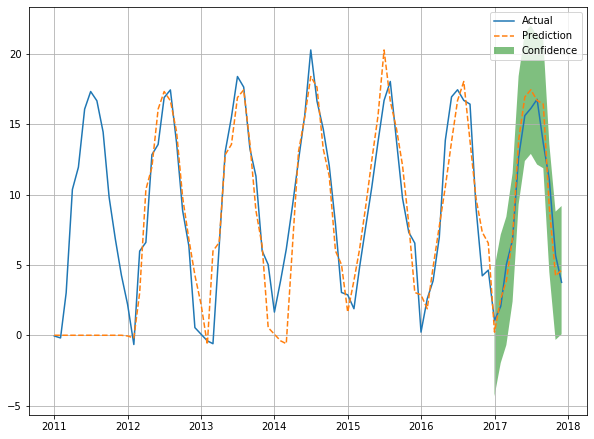

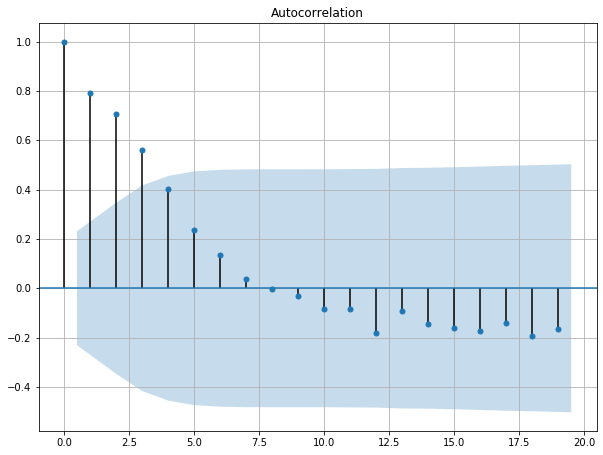

In [32]:
model = SARIMAX(data, order=(0,0,0), seasonal_order=(0,1,0,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


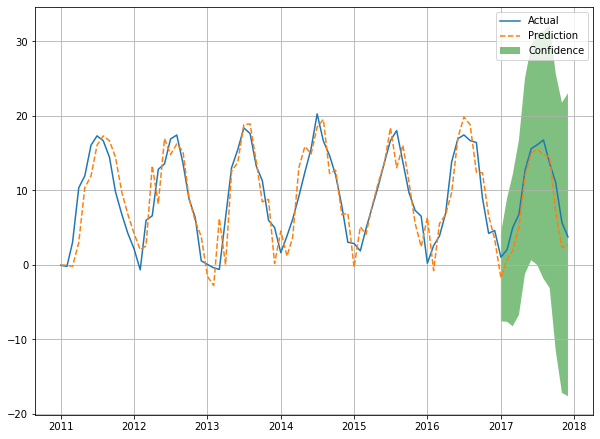

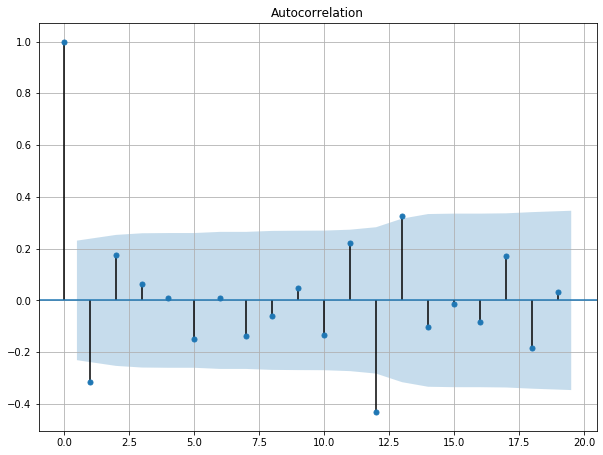

In [33]:
model = SARIMAX(data, order=(0,1,0), seasonal_order=(0,1,0,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


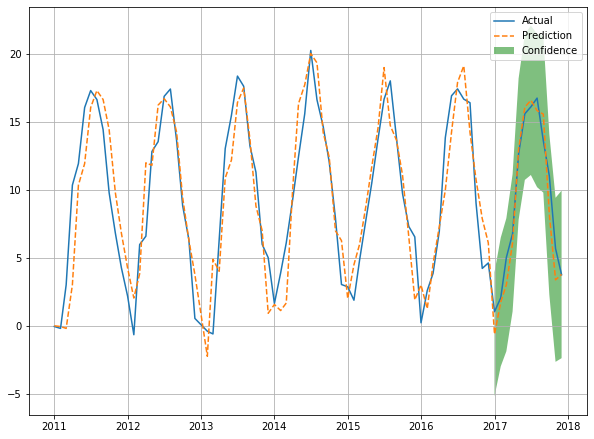

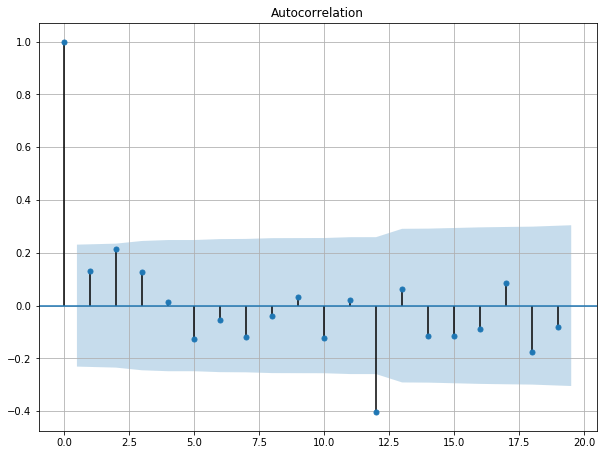

In [34]:
model = SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,0,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


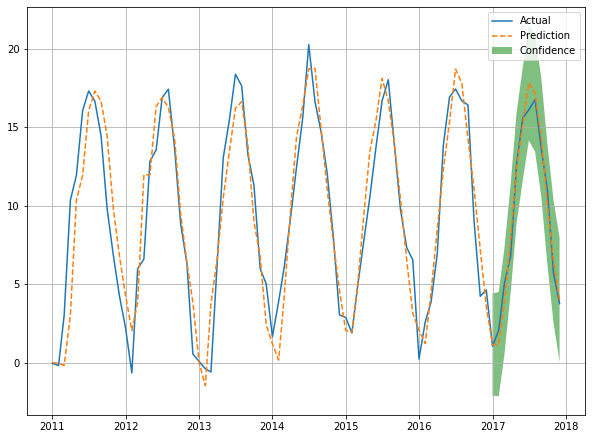

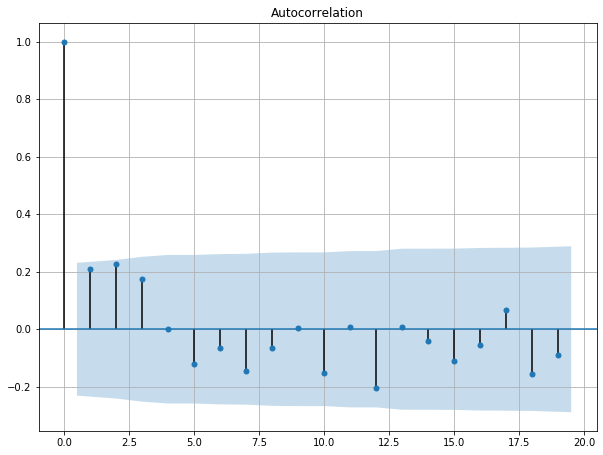

In [35]:
model = SARIMAX(data, order=(0,1,1), seasonal_order=(0,1,1,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

---

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


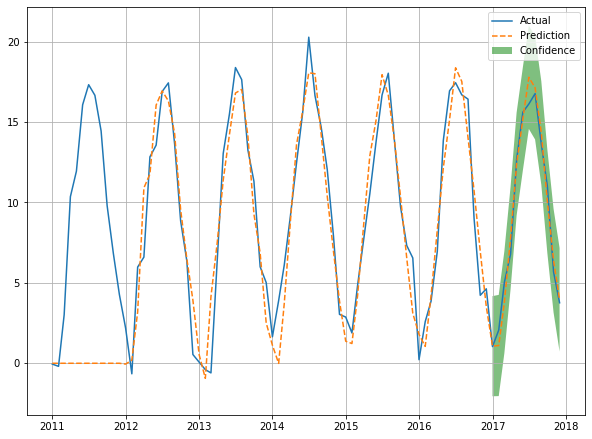

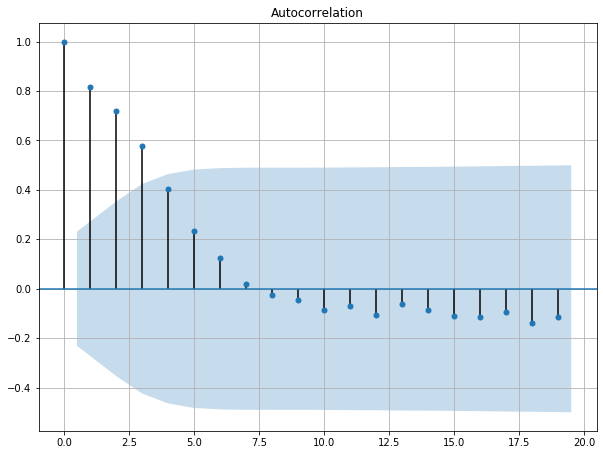

In [36]:
model = SARIMAX(data, order=(1,0,1), seasonal_order=(0,1,1,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()

c:\users\martin\pycharmprojects\dmi\venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


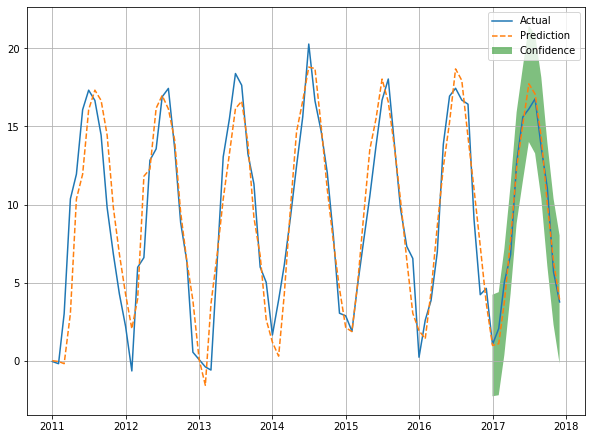

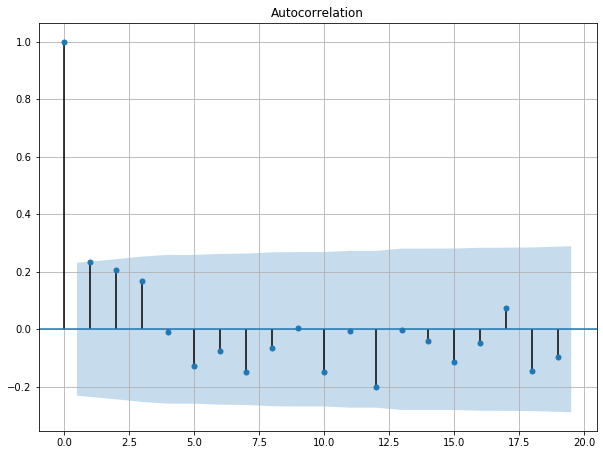

In [37]:
model = SARIMAX(data, order=(1,1,1), seasonal_order=(0,1,1,12))
model_fit: SARIMAXResults = model.fit(disp=0)
plot_forecast(data, model_fit)

fig: pyplot.Figure = plot_acf(model_fit.resid)
fig.set_size_inches(10,7.5)
pyplot.grid()